<a href="https://colab.research.google.com/github/sanyamsaxena2187/Marketing-Campaign-for-Banking-Products/blob/master/Marketing_Campaign_For_Banking_Products_Sanyam_Saxena_Internship_Studio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Marketing Campaign For Banking Products**

---
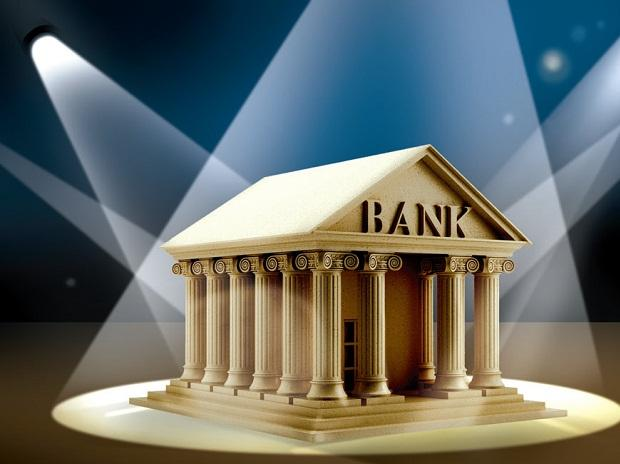

## **Problem Statement**

---
**The bank has a growing customer base. The bank wants to increase borrower (asset customers) base to bring in more loan business and earn more through the interest on loans. So, the bank wants to convert the liability based customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. The department wants you to build a model that will help them identify the potential customers who have a higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.**

### **Objective**


---


**The classification goal is to predict the likelihood of a liability customer buying personal loans.**

### **Attributes Information**

---
ID -:	Customer ID

Age -: Customer's age in completed years

Experience -:	No. years of professional experience

Income -:	Annual income of the customer ($000)

ZIP Code -: Home Address ZIP code.

Family -: Family size of the customer

CCAvg -: Avg. spending on credit cards per month ($000)

Education -: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/
Professional

Mortgage -:	Value of house mortgage if any. ($000)

***Personal Loan -: Did this customer accept the personal loan offered in the last campaign?***

Securities Account -:	Does the customer have a securities account with the bank?

CD Account -:	Does the customer have a certificate of deposit (CD) account with the bank?

Online -:	Does the customer use internet banking facilities?

CreditCard -:	Does the customer use a credit card issued by UniversalBank?

### **#Coding Begins**

---

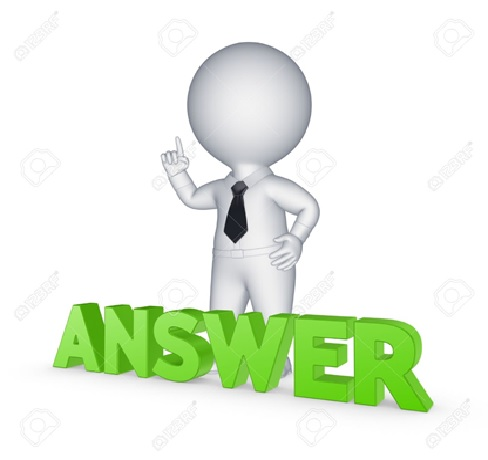

Importing The Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import io

Upload the data file "Bank_Personal_Loan_Modelling.csv" in CSV format.

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling.csv


Reading the datafile and making a dataframe using pandas.

In [ ]:
dataset=pd.read_csv(io.BytesIO(uploaded["Bank_Personal_Loan_Modelling.csv"]))
dataset.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
dataset.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


Just a glimpse of our data.

Following is the more information regarding our dataset.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Using describe() for deeper knowledge of our data, so as to analyse our data and perform operations accordingly. 

In [ ]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


Overall data is good but it has to be cleaned as Experience column has negative values.

In [ ]:
#Shape of our data
dataset.shape

(5000, 14)

Checking whether there are missing values (NAN) or not.

In [ ]:
dataset.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

No missing values, thus the data is supposed to be good if it is accurate and appropriate.

**Checking whether a person's Age is less than his Experience as it is not possible, might be a faulty data**

In [ ]:
dataset[dataset['Age'] < dataset['Experience']]['Age'].count()

0

No record found.

**Cleaning the Experience column for my own sake as it might be dropped later because of the correlation it has with the Age**

Cleaning the data is important as this is a particular case where we can drop it. 

In [ ]:
#clean the negative values
negExp = dataset.Experience < 0
mylist = dataset.loc[negExp]['ID'].tolist()       # getting the customer ID who has negative experience
#print(mylist)

In [ ]:
negExp.value_counts()

False    4948
True       52
Name: Experience, dtype: int64

In [ ]:
for id in mylist:
    exp = dataset['Experience'].median()
    dataset.loc[dataset.loc[np.where(dataset['ID']==id)].index, 'Experience'] = exp

In [ ]:
# checking if there are records with negative experience
dataset[dataset['Experience'] < 0]['Experience'].count()

0

Thus cleaned the Experience column.

Obviously there is a relation between Age and Experience, thus checking the correlation between Age and Experience.

In [ ]:
#correlation
correlation =dataset['Experience'].corr(dataset['Age'])
print(correlation)

0.9771816883703435


**Oh wow!**

Correlation is more than 0.99, thus any one of the columns can be dropped.

Dropping the **Experience** column as it had some faulty data.

Also dropping **ID** column as every ID is unique and it is a nominal variable which is not related to our **Target Variable**.

In [ ]:
#Dropping unwanted columns
#Experience,ID
dataset=dataset.drop(['Experience','ID'],axis=1)
dataset.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


Checking the unique values of the variables.

In [ ]:
#unique check if possible
dataset.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

**From this we can Infer that**

Following are the binary variables :
* Personal Loan ...............................................**Target variable**
* Securities Account
* CD Account
* Online
* Credit Card

Following are the interval variables :
* Age
* Experience
* Income
* CCAvg
* Mortage

Following are the ordinal or categorical variables :
* Family - Family size of the customer
* Education - education level of the customer

Following are the nominal variables :
* ID
* ZIP Code

As unique values of column ZIP code are 467, which makes it a nominal variable thus it is of no use for now. Hence dropping it.
Also, if the unique values were less, something through which we could have categorized people through ZIP code, I might have not dropped this column as then there might be a relation between the area from which more people might take the loan.

In [ ]:
dataset=dataset.drop('ZIP Code',axis=1)
dataset.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


**Some deeper analysis to explore our data**

**### EXPLORATORY DATA ANALYSIS!!!**

In [ ]:
#count of records where Mortgage column's value is zero.
#dataset[dataset['Mortgage'] == 0]['Mortgage'].count()
(dataset.Mortgage == 0).sum()
#Less people are there with mortgage value not equal to zero.

3462

In [ ]:
#count of records where CCAvg column's value is zero.
#dataset[dataset['CCAvg'] == 0]['CCAvg'].count()
(dataset.CCAvg == 0).sum()
#majority uses a  credit card frequently. 

106

**Value counts of all categorical columns.**

In [ ]:
columns=('Family','Education','Securities Account','CD Account','Online','CreditCard')
pieces = []
for col in columns:
    tmp_series = dataset[col].value_counts()
    tmp_series.name = col
    pieces.append(tmp_series)
df_value_counts = pd.concat(pieces, axis=1)
print(df_value_counts)

   Family  Education  Securities Account  CD Account  Online  CreditCard
0     NaN        NaN              4478.0      4698.0  2016.0      3530.0
1  1472.0     2096.0               522.0       302.0  2984.0      1470.0
2  1296.0     1403.0                 NaN         NaN     NaN         NaN
3  1010.0     1501.0                 NaN         NaN     NaN         NaN
4  1222.0        NaN                 NaN         NaN     NaN         NaN


**Univariate analysis**

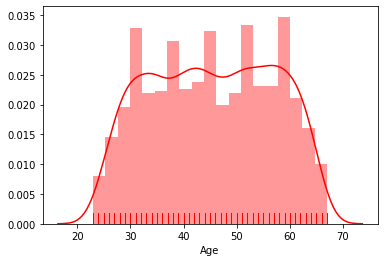

In [ ]:
sns.distplot(dataset.Age,color='Red',rug=True);
#Age is similar to that of a bell curve (normally distributed).

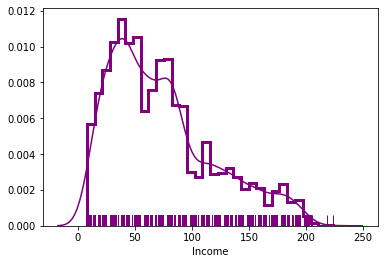

In [ ]:
sns.distplot(dataset.Income,rug=True,color='Purple',hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1});
#Income is right skewed that is, less people with more salary.
#Power trasnformation is required

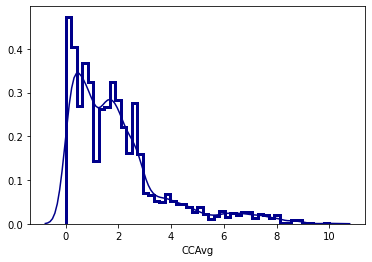

In [ ]:
sns.distplot(dataset.CCAvg,color='DarkBlue',hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1});
#CCAvg is right skewed too that is, less people with more expenditures through a credit card.
#Power trasnformation is required

Mortgage column is right skewed too.

Also its skewness cannot be reduced using power transformation thus integer encoding(binning) will be done.

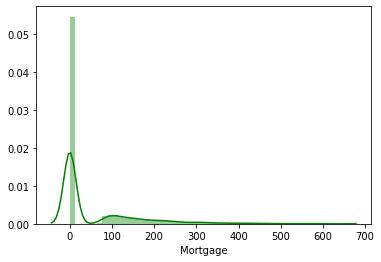

In [ ]:
sns.distplot(dataset.Mortgage,color='Green');

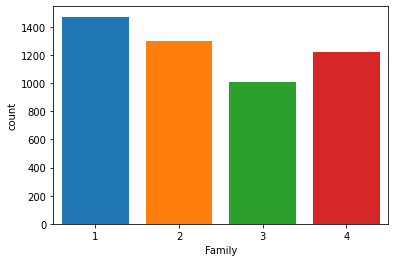

In [ ]:
#graph showing the count of members in a family
sns.countplot(dataset.Family,saturation=1);

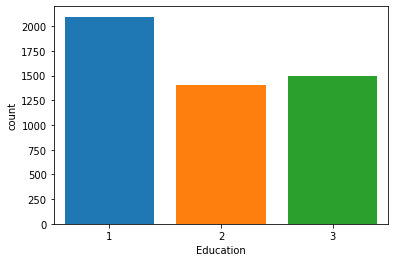

In [ ]:
#graph showing the level of education of a person
sns.countplot(dataset.Education,saturation=1);

**Bivariate Anlysis**

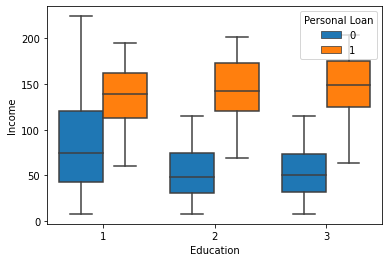

In [ ]:
#Plot showing that people earning more take the personal loan almost irrespective of the level of education 
#but people of education level 1 earns more compared to the other ones who have not taken the personal loan.
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=dataset,saturation=1);

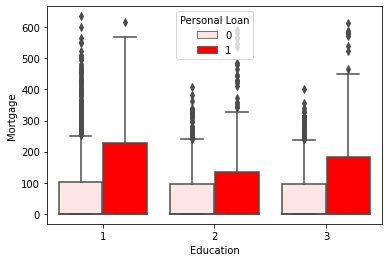

In [ ]:
#Plot shows that generally people with high mortgage takes a personal loan
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=dataset,color='Red',saturation=1)

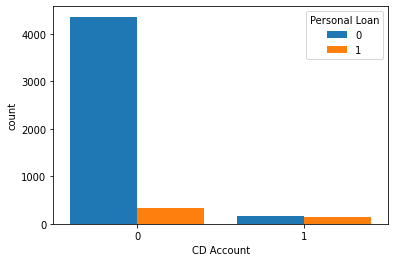

In [ ]:
#Plot showing the count of CD Account with respect to the Pesonal Loan.
sns.countplot(x='CD Account',data=dataset,hue='Personal Loan',saturation=1);

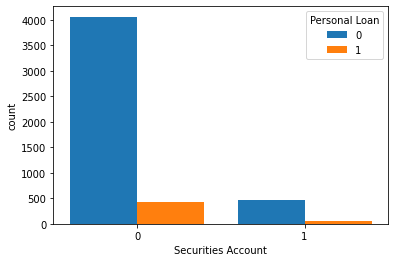

In [ ]:
#Plot showing the count of Securities Account with respect to the Pesonal Loan.
sns.countplot(x='Securities Account',data=dataset,hue='Personal Loan',saturation=1);

 Majority who has not taken the personal loan who has securities account.

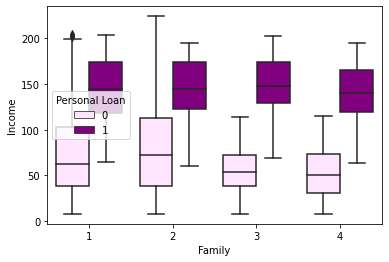

In [ ]:
#Plot depicting the income and family with restpect to personal loan
sns.boxplot(x="Family",y="Income",hue="Personal Loan",saturation=1,color="Purple",data=dataset)

Families with lesser income might not take the personal loan,than families with higher income.

**HEATMAP showing the correlation between each and every variable of our data**

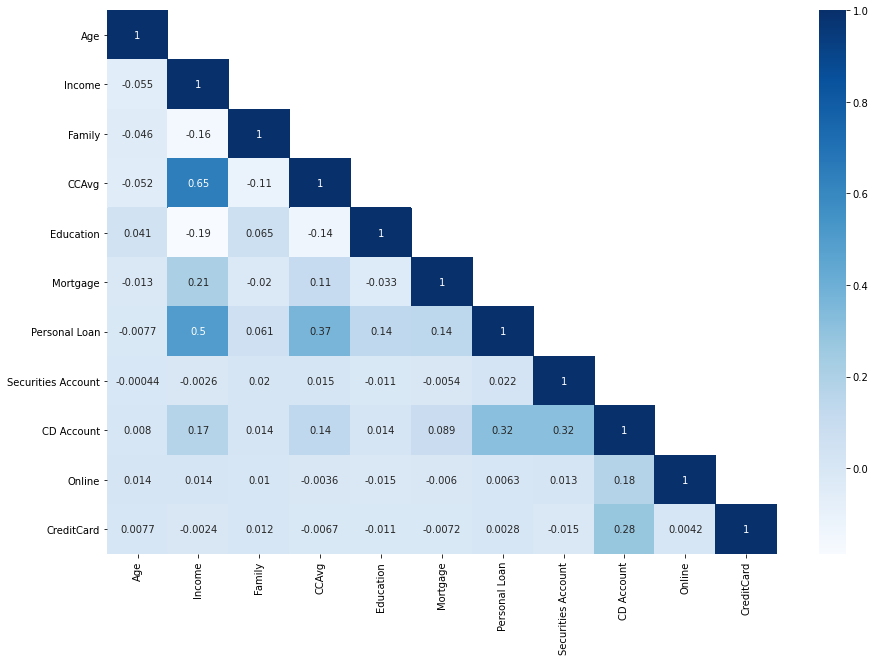

In [ ]:
fig,ax=plt.subplots(figsize=(15,10))
mask = np.zeros_like(dataset.corr())
mask[np.triu_indices_from(mask, 1)] = True
a=sns.heatmap(dataset.corr(),cmap='Blues',annot=True,mask=mask);

Here,CCAvg and Income is correlated (0.65).
Income is correlated to (the target variable) Personal Loan (0.5).


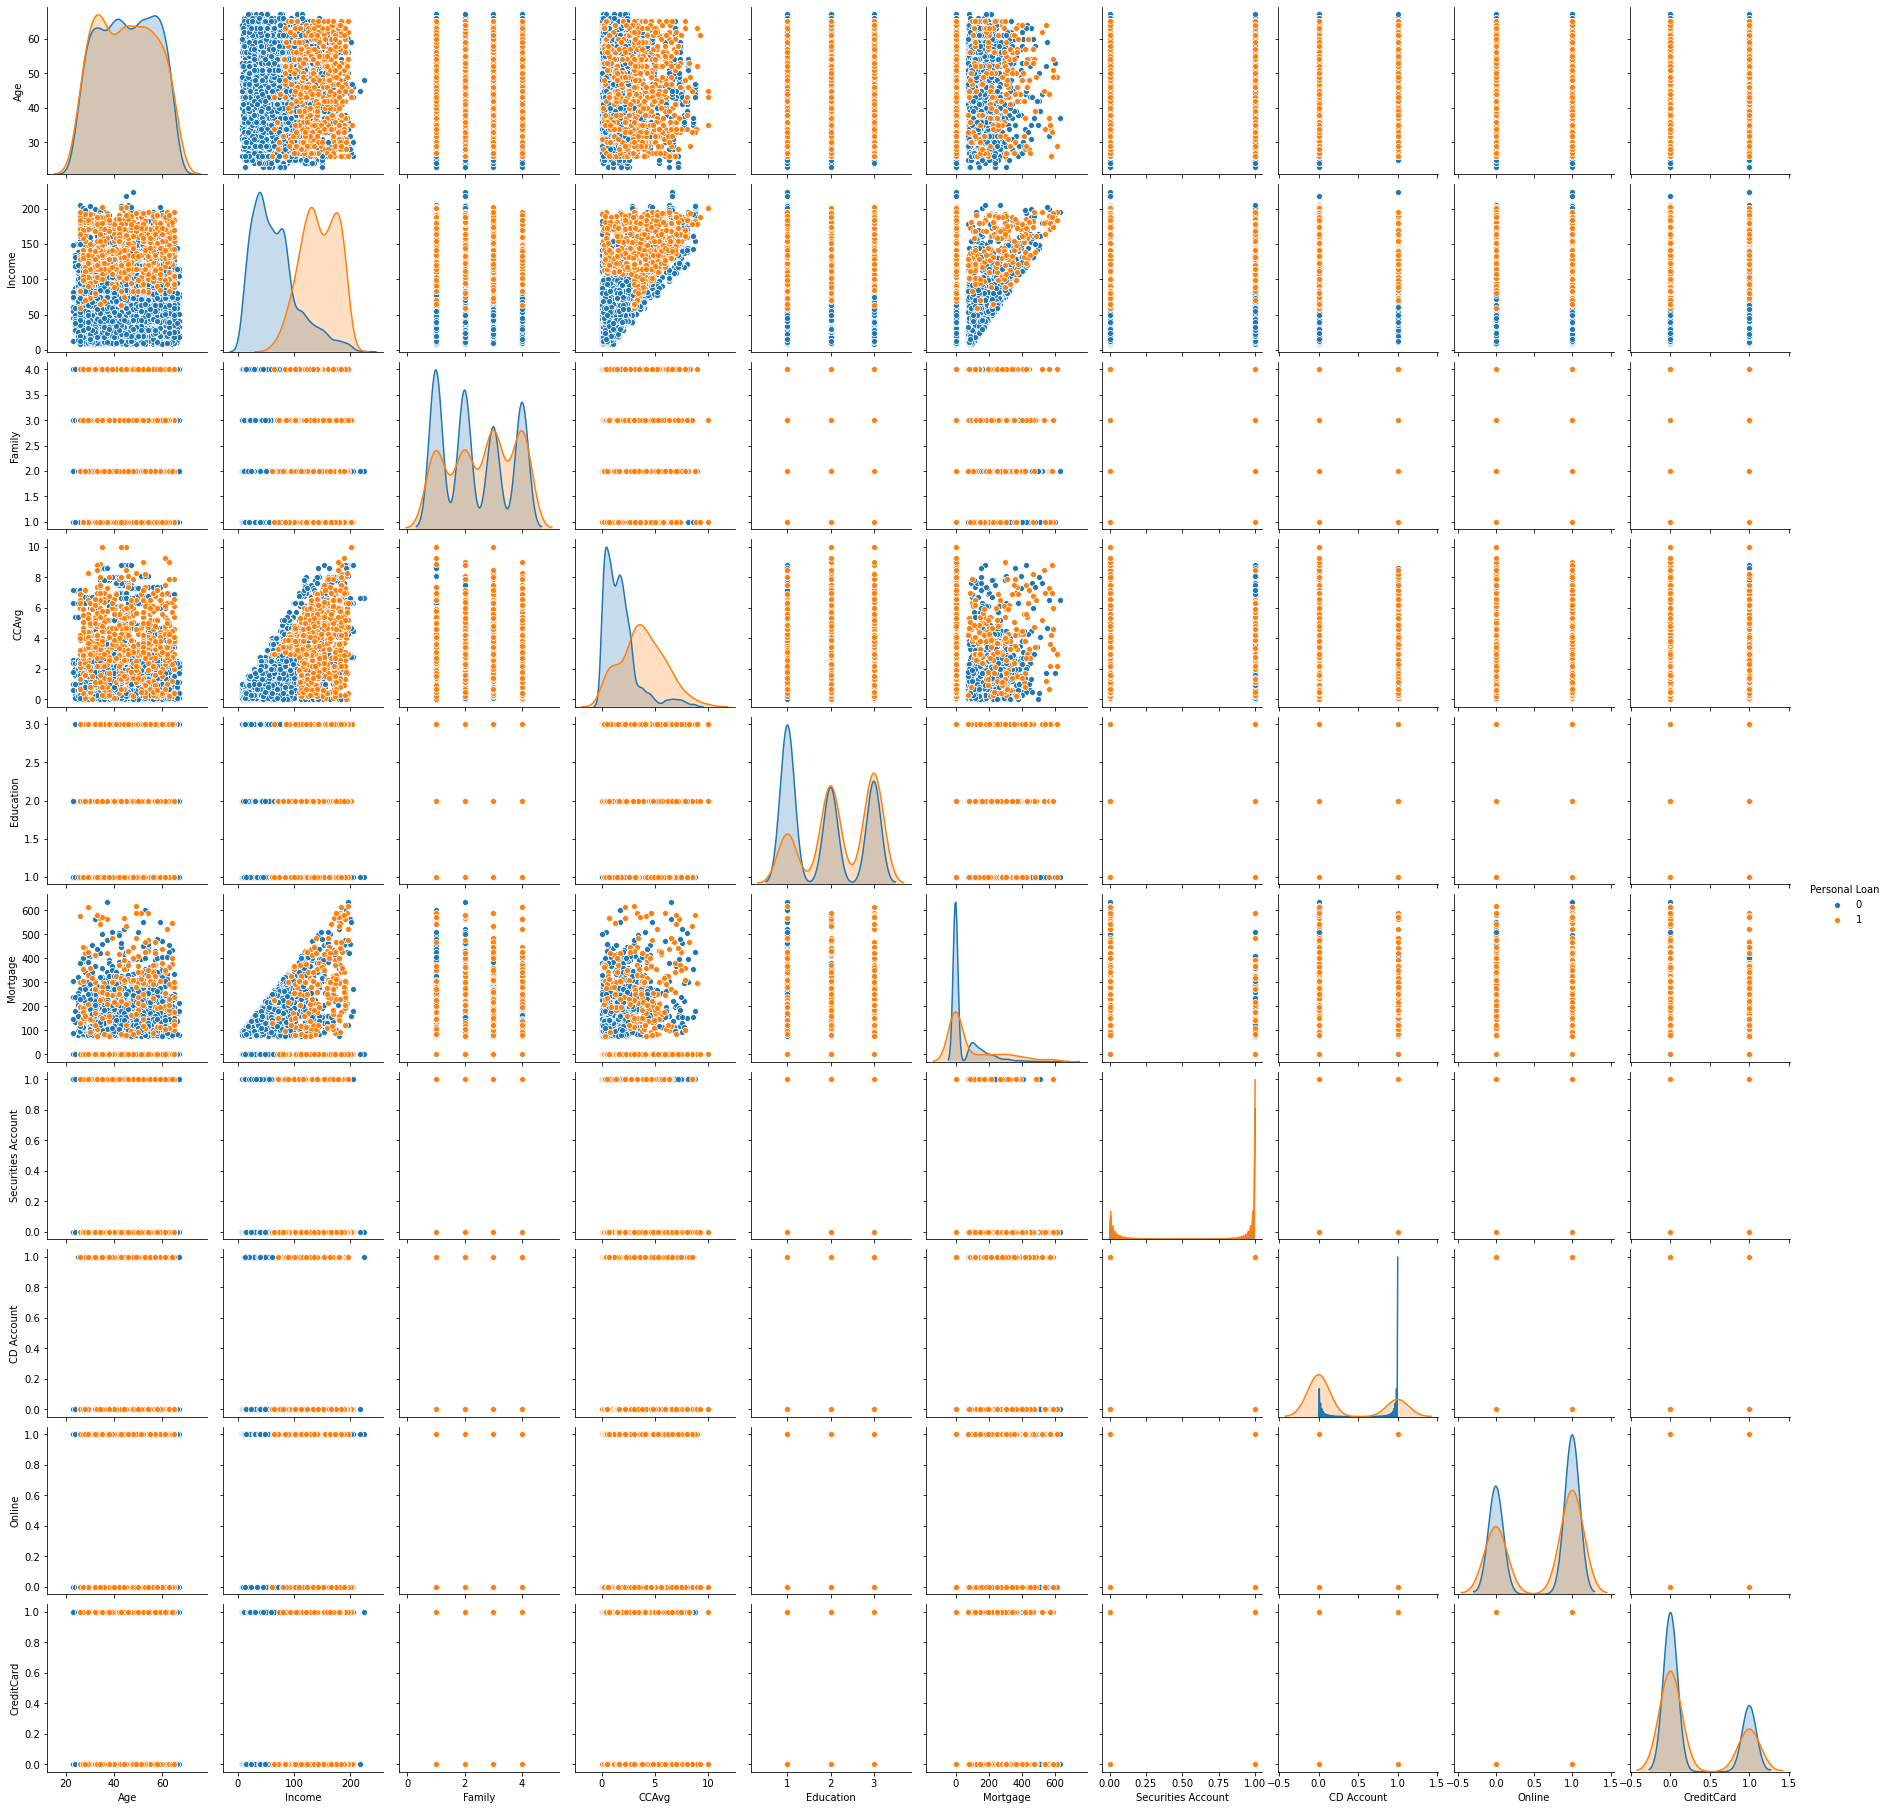

In [ ]:
#pairplot, plots a graph between each feature of the dataset.
sns.pairplot(dataset,hue='Personal Loan');

**Doing the transformation of the feature variables.**

In [ ]:
x=dataset.loc[:,dataset.columns!='Personal Loan']
y=dataset['Personal Loan']

In [ ]:
'''
from sklearn.preprocessing import PowerTransformer
powertrans=PowerTransformer(method='yeo-johnson',standardize=False)
powertrans.fit(x["Income"].values.reshape(-1,1))
x["Income"]=powertrans.transform(x["Income"].values.reshape(-1,1))
sns.distplot(x.Income,rug=True,color='Purple',hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1});
'''

'\nfrom sklearn.preprocessing import PowerTransformer\npowertrans=PowerTransformer(method=\'yeo-johnson\',standardize=False)\npowertrans.fit(x["Income"].values.reshape(-1,1))\nx["Income"]=powertrans.transform(x["Income"].values.reshape(-1,1))\nsns.distplot(x.Income,rug=True,color=\'Purple\',hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1});\n'

Difference between yeo-johnson method and box-cox for Income. 

**Used box-cox method for Income as all Income values are greater than zero.**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


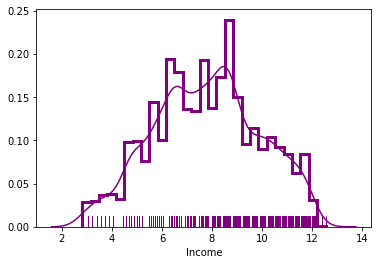

In [ ]:
from sklearn.preprocessing import PowerTransformer
powertrans=PowerTransformer(method='box-cox',standardize=False)
powertrans.fit(x["Income"].values.reshape(-1,1))
x["Income"]=powertrans.transform(x["Income"].values.reshape(-1,1))
sns.distplot(x.Income,rug=True,color='Purple',hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1});

**Used yeo-jhonson method for CCAvg as some values of CCAvg are zero and for those values (values<=0) ,box-cox method is not suitable.**

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


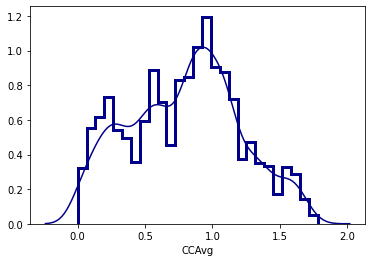

In [ ]:
powertrans=PowerTransformer(method='yeo-johnson',standardize=False)
powertrans.fit(x["CCAvg"].values.reshape(-1,1))
x.CCAvg=powertrans.transform(x["CCAvg"].values.reshape(-1,1))
sns.distplot(x.CCAvg,color='DarkBlue',hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1});

**Integer Encoding (Binning) as it has skewed and somewhat discontinous data.**

In [ ]:
x['Mortgage_Int']=pd.cut(x.Mortgage,bins=[0,100,200,300,400,500,600,700],labels=[0,1,2,3,4,5,6],include_lowest=True,)
x.drop('Mortgage',axis=1,inplace=True)

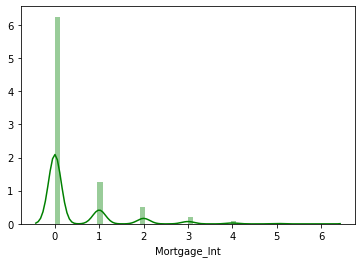

In [ ]:
sns.distplot(x.Mortgage_Int,color='Green');

In [ ]:
x.head()

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_Int
0,25,6.994487,4,0.845160,1,1,0,0,0,0
1,45,5.974230,3,0.814478,1,1,0,0,0,0
2,39,3.402765,1,0.633777,1,0,0,0,0,0
3,35,9.309254,1,1.107427,2,0,0,0,0,0
4,35,6.747451,4,0.633777,2,0,0,0,1,0


**Normalising the feature variables using standard scaler.
We can also use Normalizer().**

In [ ]:
from sklearn.preprocessing import StandardScaler 
x_ss = StandardScaler().fit_transform(x)
y_ss=y
#y_ss = StandardScaler().fit_transform(y)  #Not required

**Splitting the data into training and test set in the ratio of 70:30 respectively**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_ss,y_ss,test_size = 0.3,stratify=y,random_state = 0)

In [ ]:
#shape of training data and test data
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(3500, 10) (1500, 10) (3500,) (1500,)


**Using Logistic Regression model to predict the likelihood of a customer buying personal loans.**

Importing the Logistic Regression Model and then fitting the data and thus using it to predict the target variable.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Predicted values

In [ ]:
y_predict=model.predict(x_test)
#y_predict=y_predict.reshape(1500,1)
print(y_predict)    #printing the values of the prediction

[1 0 0 ... 0 0 0]


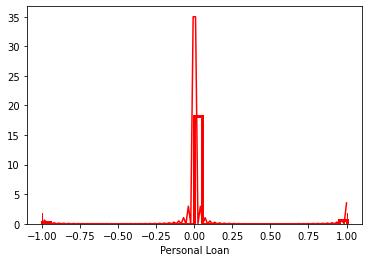

In [ ]:
sns.distplot(y_test-y_predict,rug=True,color='Red',hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1});

Plot showing that values belong to a set [-1,0,1].
That is either zero or -1 or 1 depending upon the predicted values.

**Confusion Matrix**

*Shows true positve, true negative, false positive,false negative*

Very important method to judge which classification model is better.

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_predict,rownames=['Actual___________ '],colnames=['_________Predicted -: '])
confusion_matrix

_________Predicted -:,0,1
Actual___________,,
0,1338,18
1,50,94


Confusion matrix tells us about our model's accuracy. Here, the **50** values of that are actually true are predicted false which is not a neglegible error and thus we must try other models to reduce this as this is in favour of bank. 

Confusion matrix's heatmap, which gives more understanding than a confusion matrix.

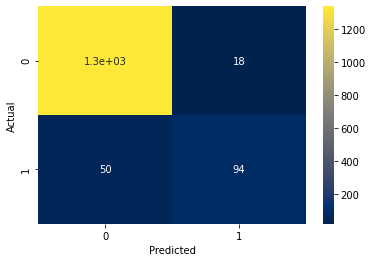

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.crosstab(y_test, y_predict,rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True,cmap='cividis');

Percentage distribution

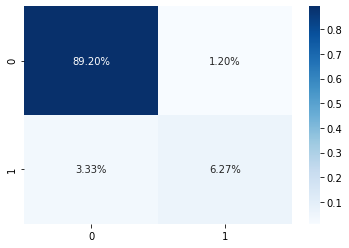

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm/np.sum(cm), annot=True,fmt='.2%', cmap='Blues');

**Accuracy of training  set of Logistic Regression Model**

---



In [ ]:
y_predict_train=model.predict(x_train)
print(metrics.accuracy_score(y_train,y_predict_train))

0.9568571428571429


**Accuracy of test set of Logistic Regression Model**

In [ ]:
print(metrics.accuracy_score(y_test,y_predict))

0.9546666666666667


In [ ]:
print('ROC AUC score :', roc_auc_score(y_test,y_predict))

ROC AUC score : 0.819751720747296


Classifiaction Report which tells us about the Precision, Recall value, F1 score, which provides us an insight of our model and tells us where it lacks and where it needs improvement.

Also it helps to ccompare different models and to judge the best one.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1356
           1       0.84      0.65      0.73       144

    accuracy                           0.95      1500
   macro avg       0.90      0.82      0.85      1500
weighted avg       0.95      0.95      0.95      1500



According to me, errors (different metrics) and classification report tells about the best model rather than the accuracy of the respective model as accuracy just tells about that the model predicted wrongly (x%), while metrics and classifiaction report and the confusion matrix tells us where the model predicted wrongly and thus this can be reduced according to our target variable by using different models which might be less accurate but more profitable.

Importing metrics to check the errors of the model.
Thus the metrics show that our model's prediction is pretty good.

In [ ]:
from sklearn import metrics
print('Mean Absolute Error      :', metrics.mean_absolute_error(y_test,y_predict))
print('Root Mean Squared Error  :', np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

Mean Absolute Error      : 0.04533333333333334
Root Mean Squared Error  : 0.21291625896895083


Cross Validation is done to check that our model is generalised or not.

In [ ]:
from sklearn.model_selection import cross_val_score

classifier = LogisticRegression(random_state =0)
scores = cross_val_score(classifier, x_train , y_train, cv=8)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.956621   0.94292237 0.94292237 0.95890411 0.9610984  0.94736842
 0.97254005 0.96338673]


**Decision tree classifier**

Splitting the data as per the requirement

In [ ]:
from sklearn.model_selection import train_test_split
x["Personal Loan"]=dataset["Personal Loan"]
train_set, test_set = train_test_split(x, test_size=0.3 ,random_state=0,stratify=y)

In [ ]:
train_labels = train_set.pop('Personal Loan')
test_labels = test_set.pop('Personal Loan')

Importing the Decision tree classifier and then fitting the data and thus using it to predict the target variable.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Predicted values

In [ ]:
predict=dt_model.predict(test_set)
predict

array([1, 0, 0, ..., 0, 0, 0])

**Confusion Matrix**

Shows true positve, true negative, false positive,false negative

Very important method to judge which classification model is better.

In [ ]:
confusion_matrix = pd.crosstab(predict,test_labels,rownames=['Actual___________ '],colnames=['_________Predicted -: '])
confusion_matrix

_________Predicted -:,0,1
Actual___________,,
0,1345,24
1,11,120


Confusion matrix's heatmap, which gives more understanding than a confusion matrix.

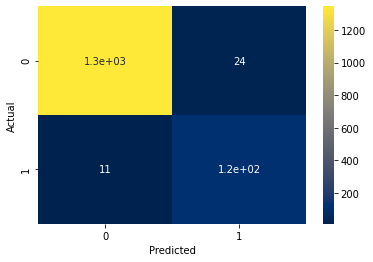

In [ ]:
confusion_matrix = pd.crosstab(predict, test_labels,rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True,cmap='cividis');

Heat map clearly shows that those 11 values which are actually true are predicted false. But this is neglible here as it is much less than that of Logistic Regression Model. And thus by using this model, bank will get more profit as compared to that of Logistic Regression one.

**Accuracy of training  set of Decision Tree Classifier**

In [ ]:
dt_model.score(train_set , train_labels)

0.976

**Accuracy of test set of Decision Tree Classifier**

In [ ]:
dt_model.score(test_set , test_labels)

0.9766666666666667

**Best Accuracy**

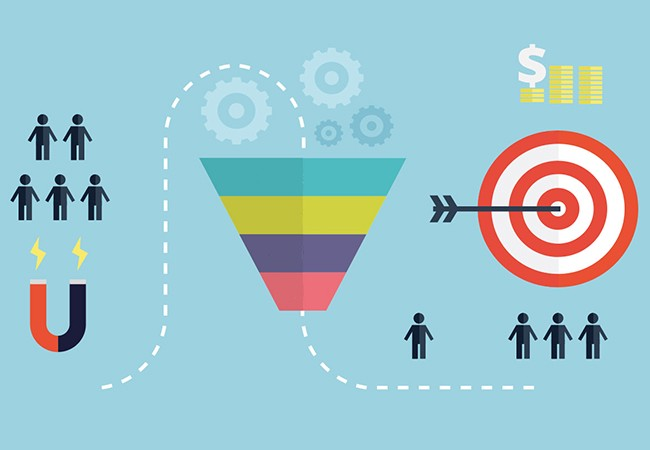

Classifiaction Report which tells us about the Precision, Recall value, F1 score, which provides us an insight of our model and tells us where it lacks and where it needs improvement.

Also it helps to ccompare different models and to judge the best one.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(predict, test_labels))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1369
           1       0.83      0.92      0.87       131

    accuracy                           0.98      1500
   macro avg       0.91      0.95      0.93      1500
weighted avg       0.98      0.98      0.98      1500



According to me, errors (different metrics) and classification report tells about the best model rather than the accuracy of the respective model as accuracy just tells about that the model predicted wrongly (x%), while metrics and classifiaction report and the confusion matrix tells us where the model predicted wrongly and thus this can be reduced according to our target variable by using different models which might be less accurate but more profitable.

Importing metrics to check the errors of the model.
Thus the metrics show that our model's prediction is pretty good.

In [ ]:
from sklearn import metrics
print('Mean Absolute Error      :', metrics.mean_absolute_error(test_labels,predict))
print('Root Mean Squared Error  :', np.sqrt(metrics.mean_squared_error(test_labels,predict)))


Mean Absolute Error      : 0.023333333333333334
Root Mean Squared Error  : 0.15275252316519466


**Naive Bayes**

Importing the Naive Bayes classifier and then fitting the data and thus using it to predict the target variable.

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_model = GaussianNB()
naive_model.fit(train_set, train_labels)
prediction = naive_model.predict(test_set)

Predicted values

In [ ]:
prediction

array([1, 0, 0, ..., 0, 0, 0])

**Confusion Matrix**

Shows true positve, true negative, false positive,false negative

Very important method to judge which classification model is better.

In [ ]:
confusion_matrix = pd.crosstab(prediction,test_labels,rownames=['Actual___________ '],colnames=['_________Predicted -: '])
confusion_matrix

_________Predicted -:,0,1
Actual___________,,
0,1293,67
1,63,77


Confusion matrix's heatmap, which gives more understanding than a confusion matrix.

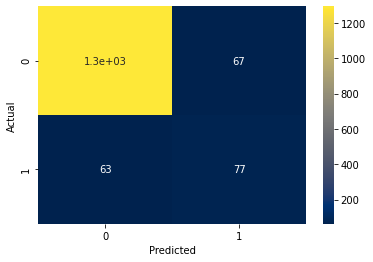

In [ ]:
confusion_matrix = pd.crosstab(prediction, test_labels,rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True,cmap='cividis');

Naive Bayes model will not be preferred here as Logistic Regression is much better than this an also the accuracy is comparitively very less.

**Accuracy of training  set of Naive Bayes Classifier**

In [ ]:
naive_model.score(train_set,train_labels)

0.9085714285714286

**Accuracy of test set of Naive Bayes Classifier**

In [ ]:
naive_model.score(test_set,test_labels)

0.9133333333333333

Classifiaction Report which tells us about the Precision, Recall value, F1 score, which provides us an insight of our model and tells us where it lacks and where it needs improvement.

Also it helps to ccompare different models and to judge the best one.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(prediction, test_labels))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1360
           1       0.53      0.55      0.54       140

    accuracy                           0.91      1500
   macro avg       0.74      0.75      0.75      1500
weighted avg       0.91      0.91      0.91      1500



According to me, errors (different metrics) and classification report tells about the best model rather than the accuracy of the respective model as accuracy just tells about that the model predicted wrongly (x%), while metrics and classifiaction report and the confusion matrix tells us where the model predicted wrongly and thus this can be reduced according to our target variable by using different models which might be less accurate but more profitable.

Importing metrics to check the errors of the model.
Thus the metrics show that our model's prediction is pretty good.

In [ ]:
from sklearn import metrics
print('Mean Absolute Error      :', metrics.mean_absolute_error(test_labels,prediction))
print('Root Mean Squared Error  :', np.sqrt(metrics.mean_squared_error(test_labels,prediction)))

Mean Absolute Error      : 0.08666666666666667
Root Mean Squared Error  : 0.2943920288775949


**Random Forest classifier**

Importing the Random Forest classifier and then fitting the data and thus using it to predict the target variable.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomforest_model = RandomForestClassifier(max_depth=2, random_state=0)
randomforest_model.fit(train_set, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

One of the important characteristic feature of Random forest!!

***Importance!***

Here a bar graph is plotted depicting the **Importance** of feature variables with respect to the target variable. 

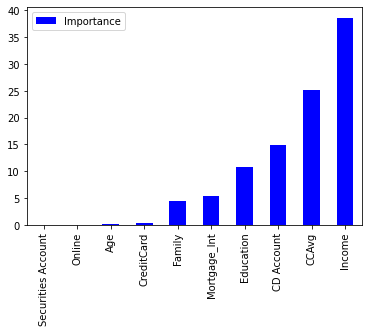

In [ ]:
Importance = pd.DataFrame({'Importance':randomforest_model.feature_importances_*100}, index=train_set.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='bar',color='blue');

The above graph is depicting that, the importance is gradually increasing and reaches the maximum value for Income variable.

Personal Loan (target variable) is majorly dependent on Income.

Secondly it is dependent on Credit Card Average bill per month.

Further it is dependent on other variables also but those variables dont affect much when compared to these 2 variables (Income,CCAvg). 

Predicted values

In [ ]:
predicted_random=randomforest_model.predict(test_set)
predicted_random

array([0, 0, 0, ..., 0, 0, 0])

**Confusion Matrix**

Shows true positve, true negative, false positive,false negative

Very important method to judge which classification model is better.

In [ ]:
confusion_matrix = pd.crosstab(predicted_random,test_labels,rownames=['Actual___________ '],colnames=['_________Predicted -: '])
confusion_matrix

_________Predicted -:,0,1
Actual___________,,
0,1356,106
1,0,38


Confusion matrix's heatmap, which gives more understanding than a confusion matrix.

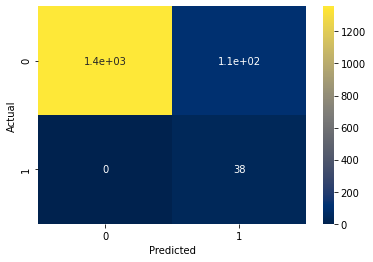

In [ ]:
confusion_matrix = pd.crosstab(predicted_random, test_labels,rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True,cmap='cividis');

Heat map clearly shows that zero values are  predicted false which are actually true.
Thus Random Forest is one of the best model for now but as its accuracy is little less than that of Decision tree thus, Decision tree is also in the competition for the best model. 

But Random Forest mostly out perform other models easily.

Also Random forest and Decison Tree, both are better than Logistic Regression model (overall comparision). 

**Accuracy of training  set of Random Forest Classifier**

In [ ]:
randomforest_model.score(train_set,train_labels)

0.9317142857142857

**Accuracy of test set of Random Forest Classifier**

In [ ]:
randomforest_model.score(test_set,test_labels)

0.9293333333333333

Classifiaction Report which tells us about the Precision, Recall value, F1 score, which provides us an insight of our model and tells us where it lacks and where it needs improvement.

Also it helps to ccompare different models and to judge the best one.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(predicted_random, test_labels))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1462
           1       0.26      1.00      0.42        38

    accuracy                           0.93      1500
   macro avg       0.63      0.96      0.69      1500
weighted avg       0.98      0.93      0.95      1500



According to me, errors (different metrics) and classification report tells about the best model rather than the accuracy of the respective model as accuracy just tells about that the model predicted wrongly (x%), while metrics and classifiaction report and the confusion matrix tells us where the model predicted wrongly and thus this can be reduced according to our target variable by using different models which might be less accurate but more profitable.

Importing metrics to check the errors of the model.
Thus the metrics show that our model's prediction is pretty good.

In [ ]:
from sklearn import metrics
print('Mean Absolute Error      :', metrics.mean_absolute_error(test_labels,predicted_random))
print('Root Mean Squared Error  :', np.sqrt(metrics.mean_squared_error(test_labels,predicted_random)))


Mean Absolute Error      : 0.07066666666666667
Root Mean Squared Error  : 0.26583202716502513


**KNN ( K - Nearest Neighbour )**

Importing the KNN classifier and then fitting the data and thus using it to predict the target variable.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
train_set_indep = x.drop(['Personal Loan'], axis = 1)
train_set_dep = x["Personal Loan"]
X = np.array(train_set_indep)
Y = np.array(train_set_dep)
X_Train = x[ :3500 :]
X_Test = x[3501: :]
Y_Train = y[:3500 ]
Y_Test = y[3501: ]

In [ ]:
knn = KNeighborsClassifier(n_neighbors= 21 ,weights = 'uniform', metric='euclidean')
knn.fit(X_Train, Y_Train)    
predicted = knn.predict(X_Test)
from sklearn.metrics import accuracy_score
predicted

array([0, 0, 0, ..., 0, 0, 0])

Predicted values are above

**Confusion Matrix**

Shows true positve, true negative, false positive,false negative

Very important method to judge which classification model is better.

In [ ]:
confusion_matrix = pd.crosstab(predicted,Y_Test,rownames=['Actual___________ '],colnames=['_________Predicted -: '])
confusion_matrix

_________Predicted -:,0,1
Actual___________,,
0,1373,65
1,0,61


Confusion matrix's heatmap, which gives more understanding than a confusion matrix.

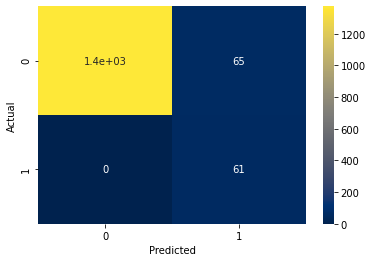

In [ ]:
confusion_matrix = pd.crosstab(predicted, Y_Test,rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True,cmap='cividis');

KNN is also a good model as zero values are predicted false which are actually true.

But its accuracy is little less thus the other models are preferred over this.

**Accuracy of training  set of KNN Classifier**

In [ ]:
predicted_train = knn.predict(X_Train)
ac=accuracy_score(Y_Train,predicted_train)
ac

0.9528571428571428

**Accuracy of test set of KNN Classifier**

In [ ]:
acc = accuracy_score(Y_Test, predicted)
print(acc)

0.9566377585056705


Classifiaction Report which tells us about the Precision, Recall value, F1 score, which provides us an insight of our model and tells us where it lacks and where it needs improvement.

Also it helps to ccompare different models and to judge the best one.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_Test, predicted))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1373
           1       1.00      0.48      0.65       126

    accuracy                           0.96      1499
   macro avg       0.98      0.74      0.81      1499
weighted avg       0.96      0.96      0.95      1499



According to me, errors (different metrics) and classification report tells about the best model rather than the accuracy of the respective model as accuracy just tells about that the model predicted wrongly (x%), while metrics and classifiaction report and the confusion matrix tells us where the model predicted wrongly and thus this can be reduced according to our target variable by using different models which might be less accurate but more profitable.

Importing metrics to check the errors of the model.
Thus the metrics show that our model's prediction is pretty good.

In [ ]:
from sklearn import metrics
print('Mean Absolute Error      :', metrics.mean_absolute_error(Y_Test,predicted))
print('Root Mean Squared Error  :', np.sqrt(metrics.mean_squared_error(Y_Test,predicted)))

Mean Absolute Error      : 0.04336224149432955
Root Mean Squared Error  : 0.2082360235269814


**Performance Comparison of Different  Models**

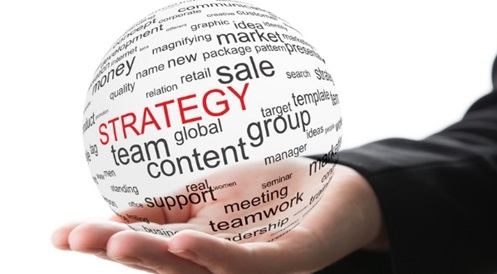

In [ ]:
#dropping the personal loan column as it is the target variable thus should not be compared.
x=x.drop(['Personal Loan'],axis=1)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LR  : 0.951000  0.009391
DTR : 0.982400  0.003072
NB  : 0.910000  0.007797
RF  : 0.987600  0.005426
KNN : 0.956800  0.008010




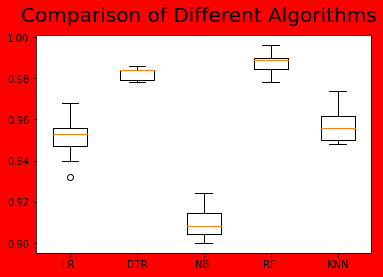

In [ ]:
#storing the models used in model.
models = []
#appending all the models.
models.append(('LR ', LogisticRegression()))
models.append(('DTR', DecisionTreeClassifier()))
models.append(('NB ', GaussianNB()))
models.append(('RF ', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
results = []
names = []
scoring = 'accuracy'
print()
print()
'''
Provides train/test indices to split data in train/test sets.
Split dataset into k consecutive folds (without shuffling by default).
Each fold is then used once as a validation while the k - 1 remaining folds form the training set.
'''
for name, model in models:
	folds = model_selection.KFold(n_splits=10)
	cv_res = model_selection.cross_val_score(model, x,y, cv=folds, scoring=scoring)
	results.append(cv_res)
	names.append(name)
	description = "%s : %f  %f" % (name, cv_res.mean(), cv_res.std())					#overall performance comparision.
	print(description)
print()
print()
#boxplot for comparing algorithms
fig = plt.figure(facecolor='Red',edgecolor='Black')					#colors
fig.suptitle('Comparison of Different Algorithms',fontsize=20)		#increase fontsize
ab = fig.add_subplot(111)	
plt.boxplot(results)						#result depiction
ab.set_xticklabels(names)				#labels
plt.show()											#ploting the graph

## **Business Understanding of the Model**


---



**Price is what you pay........**

**Value is what you get..!!!**

The bank has a growing customer base. Bank wants to increase borrowers (asset customers) to bring in more loan business and earn more through the interest on loans. 

_____________________________________________________________________________

As the bank wants to increase their profits, the liability customers must be changed to the asset customers who buy personal loans.

----------------------------------------------------------------------------

I have made a model which can predict the likelihood of a liability customer buying the personal loans.

_____________________________________________________________________________

In the beginning, I imported the library files and the dataset provided.
Then I just overviewed the data ,so as to know what it is all about.
_____________________________________________________________________________

During the analysis I saw that cleaning is to be done in the ‘Experience’ column as it had some negative values.
_____________________________________________________________________________


I checked some other conditions regarding the dataset, so as to infer more and to get a deeper analysis of the dataset and thus dropped some unwanted columns which were of no use for the target variable.
_____________________________________________________________________________

As analysis is the most important part of any model, so this much analysis was not sufficient for the model, then I started exploratory data analysis in which I checked the unique values, values of particular variables which affect more to the target variable.
_____________________________________________________________________________

Then I plotted graphs of the feature variables, I plotted univariate and bivariate graphs to get some conclusions regarding the dataset.(About levels of education, family members, relation of two variables etc.)

_____________________________________________________________________________

I plotted a heatmap for correlation and a pairplot for more understanding.
_____________________________________________________________________________

Also I got to know about the types of variable present in the dataset when I checked for the unique values and then I did a value count of all the categorical columns present in the dataset.
_____________________________________________________________________________

Then finally I explored all the data and had some insights about that.

So some variables were skewed and some were skewed and discontinuous.
_____________________________________________________________________________

So now the process of data preprocessing started and I transformed the skewed variables using box-cox and yeo-jhonson method and transformed the skewed discontinuous variable by integer encoding(label encoding) also known as binning. 
_____________________________________________________________________________

Now the skewed data was more normal and less skewed.

Then I normalized the feature variables using the standard scalar method.
_____________________________________________________________________________

Then I splitted the data into training set and test set as per the instructions.

Finally the data preprocessing stage was over and data was ready to fit into models.
_____________________________________________________________________________

Thus starting from logistic regression ,I found the accuracy score, precision,recall value,errors and some other metrics as well.
So I saw this model was quite well but some values which we cant ignore are actually true for the target variable but were predicted as false. This was the only disadvantage of logistic regression model as the other metrics were pretty good, accuracy was good.
_____________________________________________________________________________

Then I performed Decision tree model and the number of those values (actually true but were predicted false) decreased by a big amount. Accuracy was the best among all the models and other metrics were good too.
Decision tree model was better than Logistic Regression model.
_____________________________________________________________________________

Then I used Naïve Bayes classifier ,which was not so accurate compared to other models.
Accuracy and metrics both lacked at the same time.
_____________________________________________________________________________

Then I tried Random forest, It was again  a successful model and the best part was that the number of those values (actually true but were predicted false with respect to the target variable) was exactly zero that means bank will be in the maximum profit possible if it uses Random forest. But accuracy of random forest was less than that of decision tree and logistic regression model but because of metrics, its performance was better than logistic regression and 
comparable to decision tree.
_____________________________________________________________________________

Then I did KNN (K - Nearest Neighbour) model in which again those values were (actually true but were predicted false) exacly zero but the accuracy was less compared to decision Tree, but  with good metrics KNN was better than Logistic Regression.
_____________________________________________________________________________

Overall at the end I compared all the models simultaneously and saw that decision tree and random forest were best among all because of the metric 
properties.
_____________________________________________________________________________

So according to me, bank should use an algorithm which is based on decision tree for best results (also random forest is a super set of decision tree so it can be used too).
_____________________________________________________________________________


**Some possible consequences after using Decision Tree Classifier**

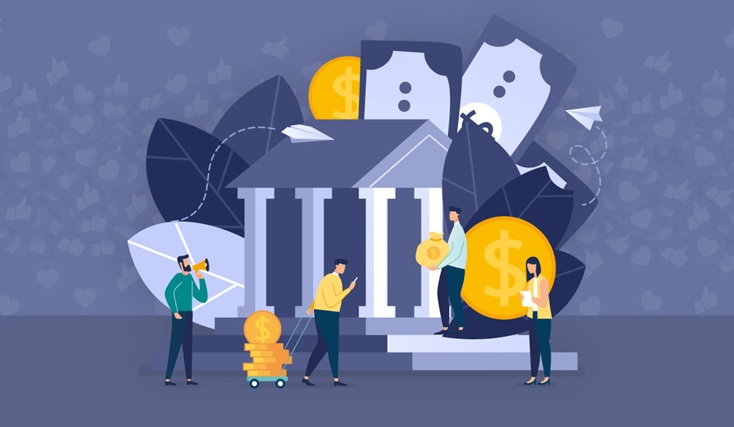

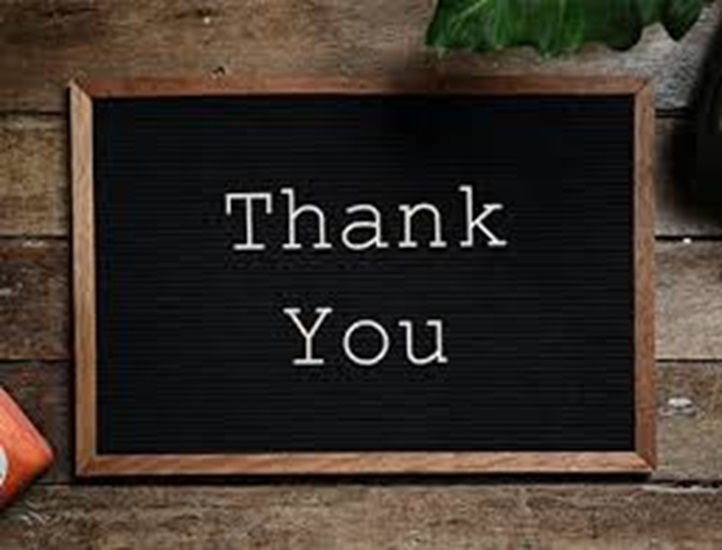